**Import Libraries**

In [1]:
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

**Import File**

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Cooltrack - US.csv to Cooltrack - US.csv


In [3]:
# Load the data
df = pd.read_csv('Cooltrack - US.csv', encoding = 'unicode_escape')
df = df.head(500)
print(df.shape)

(500, 4)


**Data Cleaning**

In [4]:
df.shape

(500, 4)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Id        500 non-null    int64         
 1   Review    498 non-null    object        
 2   date      500 non-null    datetime64[ns]
 3   Location  176 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.8+ KB


In [7]:
df.head()

,Id,Review,date,Location
0,1,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,2,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,3,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,4,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,5,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [8]:
pd.isnull(df)

,Id,Review,date,Location
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
...,...,...,...,...
495,False,False,False,True
496,False,False,False,False
497,False,False,False,False
498,False,False,False,True


In [9]:
#Check for null values
pd.isnull(df).sum()

Id            0
Review        2
date          0
Location    324
dtype: int64

In [10]:
#drop null values
df.dropna(inplace=True)

In [ ]:
pd.isnull(df).sum()

Id          0
Review      0
date        0
Location    0
dtype: int64

**Quik EDA(Exploratory Data Analysis)**

In [11]:
df.columns

Index(['Id', 'Review', 'date', 'Location'], dtype='object')

In [12]:
data_anlys = df['Review']
print(data_anlys)

0      I was very impressed with the resort.\n Great ...
1      The rooms were nice the outside needs work als...
2      Great location! I have stayed at this hotel on...
4      Great location, room was large and spacious. P...
10     Very clean and friendly and I love the locatio...
                             ...                        
493    From the moment we pull up untill time we left...
494    I liked the fact that the property has great f...
496    Good customer service and attention. Beds are ...
497    It didnât have a mini fridge or microwave . ...
499    Loved the historical look to it, the location ...
Name: Review, Length: 174, dtype: object


In [13]:
#Downlod nltk in colab
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
tokens = nltk.word_tokenize(data_anlys.to_string())
tokens[:10]

['0',
 'I',
 'was',
 'very',
 'impressed',
 'with',
 'the',
 'resort.\\n',
 'Great',
 '...']

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [16]:
#Tokenize data add tag
tagged = nltk.pos_tag(tokens)
tagged[:30]

[('0', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('impressed', 'JJ'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('resort.\\n', 'NN'),
 ('Great', 'NNP'),
 ('...', ':'),
 ('1', 'CD'),
 ('The', 'DT'),
 ('rooms', 'NNS'),
 ('were', 'VBD'),
 ('nice', 'JJ'),
 ('the', 'DT'),
 ('outside', 'JJ'),
 ('needs', 'VBZ'),
 ('work', 'NN'),
 ('als', 'NNS'),
 ('...', ':'),
 ('2', 'CD'),
 ('Great', 'NNP'),
 ('location', 'NN'),
 ('!', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('stayed', 'VBN'),
 ('at', 'IN'),
 ('this', 'DT')]

In [18]:
# Downlod Chunk For the Entities
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [19]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities[:30]

[('0', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('impressed', 'JJ'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('resort.\\n', 'NN'),
 Tree('GPE', [('Great', 'NNP')]),
 ('...', ':'),
 ('1', 'CD'),
 ('The', 'DT'),
 ('rooms', 'NNS'),
 ('were', 'VBD'),
 ('nice', 'JJ'),
 ('the', 'DT'),
 ('outside', 'JJ'),
 ('needs', 'VBZ'),
 ('work', 'NN'),
 ('als', 'NNS'),
 ('...', ':'),
 ('2', 'CD'),
 Tree('GPE', [('Great', 'NNP')]),
 ('location', 'NN'),
 ('!', '.'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('stayed', 'VBN'),
 ('at', 'IN'),
 ('this', 'DT')]

**Vaders Model Downlod For Sentiment Analysis**

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

**Run the polarity score on the entire dataset on Vader**

In [23]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Review']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/174 [00:00<?, ?it/s]

**Marge with original DataFrame**

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')


In [25]:
vaders

,Id,neg,neu,pos,compound,Review,date,Location
0,1,0.000,0.645,0.355,0.9421,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,2,0.066,0.601,0.333,0.8360,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,3,0.000,0.804,0.196,0.6588,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,5,0.000,0.542,0.458,0.9260,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
4,11,0.000,0.715,0.285,0.8940,Very clean and friendly and I love the locatio...,2019-08-19,California
...,...,...,...,...,...,...,...,...
169,494,0.000,0.808,0.192,0.5859,From the moment we pull up untill time we left...,2019-07-06,Sanit Louis Missouri
170,495,0.000,0.609,0.391,0.8402,I liked the fact that the property has great f...,2019-07-06,"Jupiter, Fl"
171,497,0.000,0.501,0.499,0.8988,Good customer service and attention. Beds are ...,2019-07-06,miami
172,498,0.000,1.000,0.000,0.0000,It didnât have a mini fridge or microwave . ...,2019-07-06,"Fayetteville,NC"


# Plot showing on LOCATION, DATE and VADER_COMPOUND

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


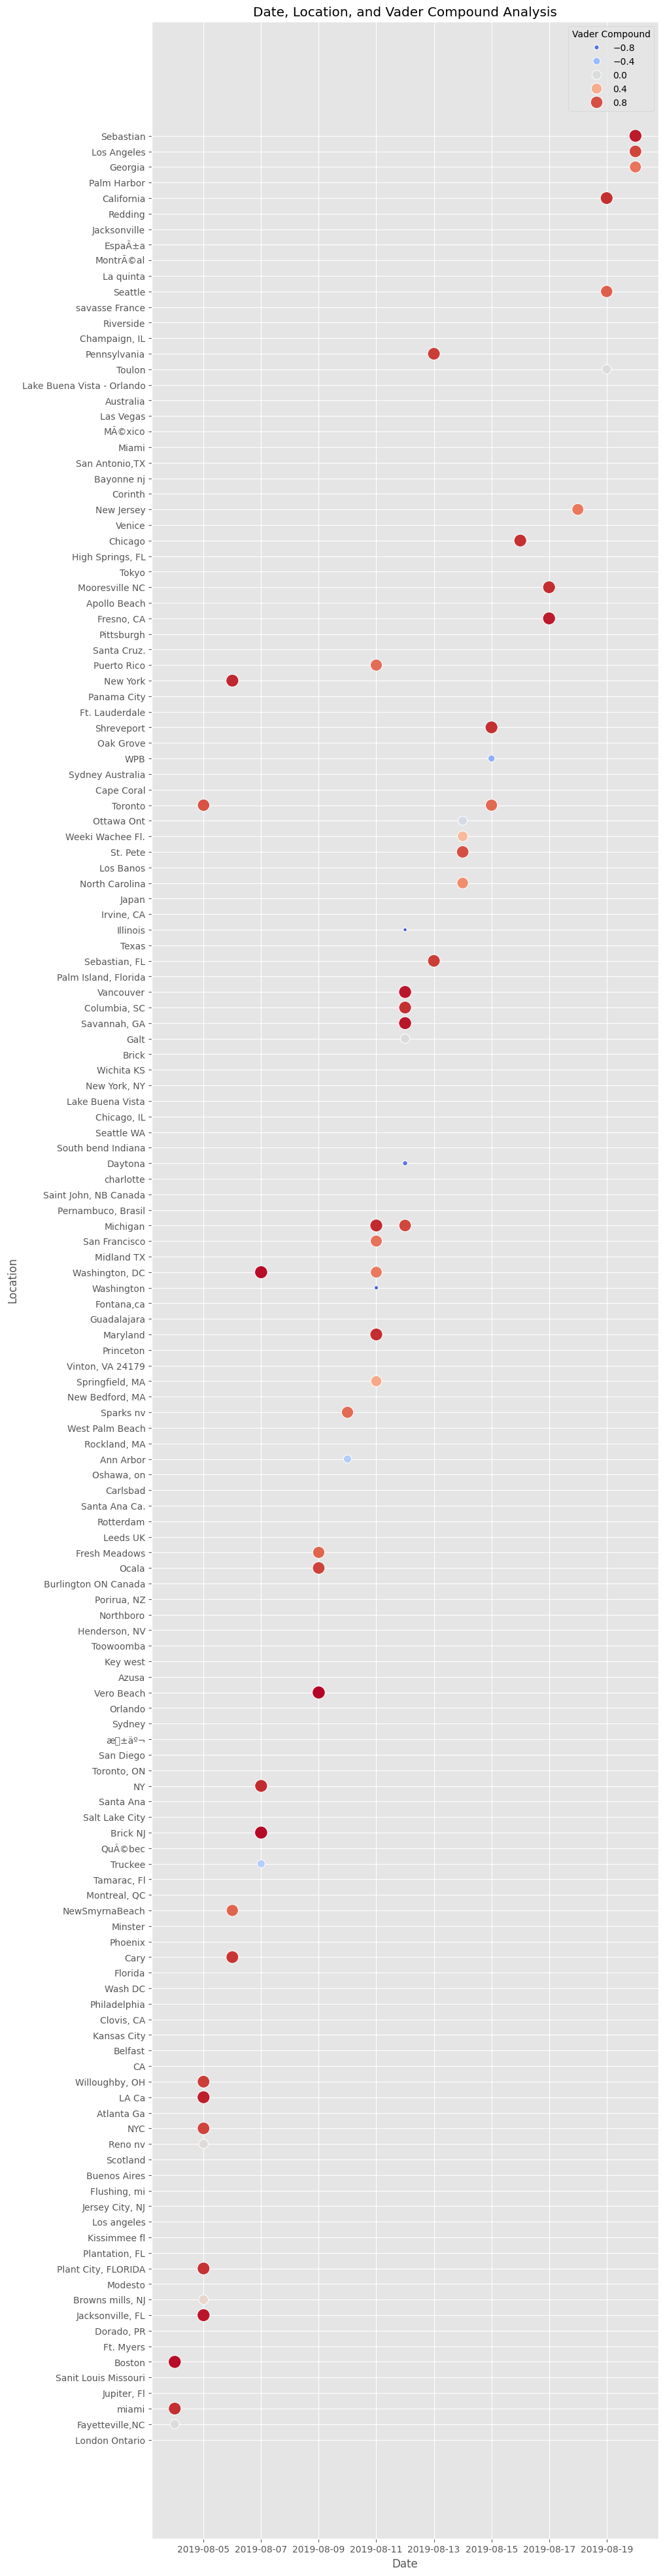

In [26]:
vaders['date'] = pd.to_datetime(df['date'])

# Scatter plot with Date, Location, and Vader Compound
plt.figure(figsize=(10, 50))
sns.scatterplot(x='date', y='Location', hue='compound', size='compound', data=vaders, palette='coolwarm', sizes=(10, 200))

# Customize the plot
plt.title('Date, Location, and Vader Compound Analysis')
plt.xlabel('Date')
plt.ylabel('Location')
plt.legend(title='Vader Compound', loc='upper right')

# Show the plot
plt.show()

**Roberta Pretrained Model**

In [27]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [28]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

**Run for Roberta Model**

In [29]:
def polarity_scores_roberta(data_anlys):
  encoded_test = tokenizer(data_anlys, return_tensors='pt')
  output = model(**encoded_test)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]}
  return scores_dict


In [30]:
roberta_result = polarity_scores_roberta('Review')
roberta_result

{'roberta_neg': 0.19927412,
 'roberta_neu': 0.6133771,
 'roberta_pos': 0.18734878}

#Compare score between models

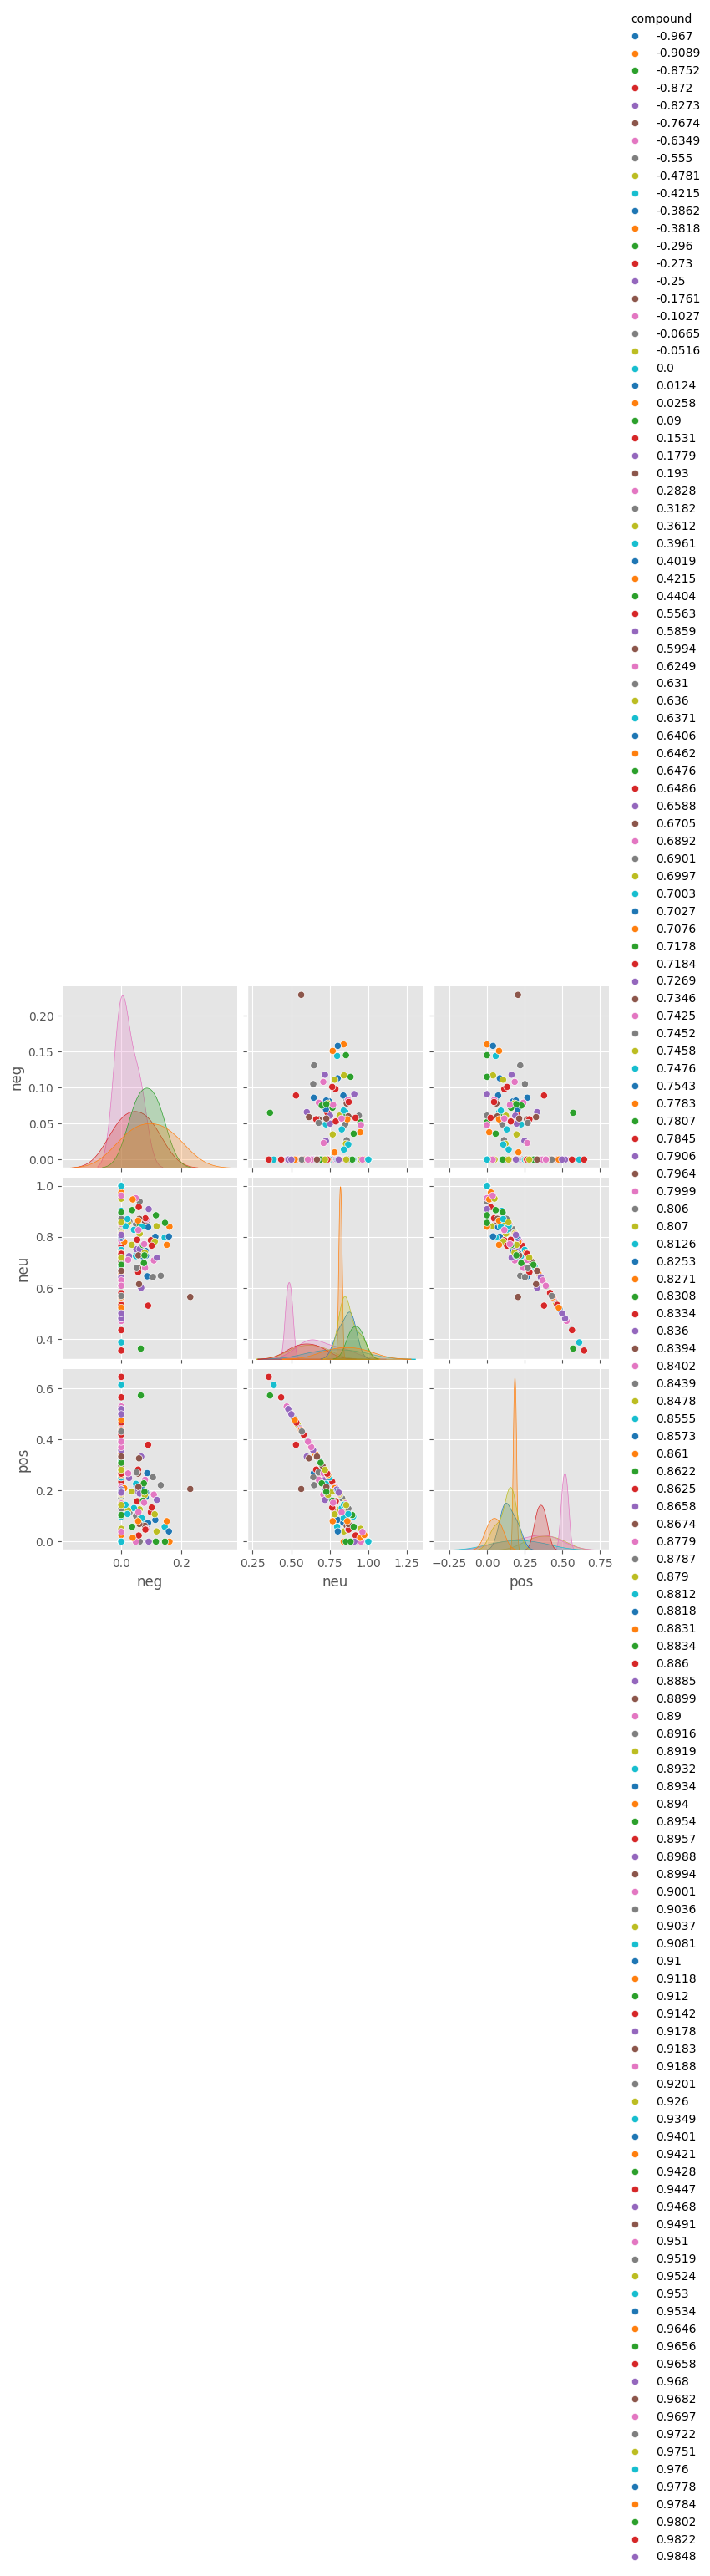

In [31]:
sns.pairplot(data=vaders,vars=['neg', 'neu', 'pos'], hue= 'compound', palette = 'tab10')
plt.show()